***PART 1 - LOADING LIBRARIES AND DATABASE***

In [1]:
#!pip install plotly

In [2]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#ls drive/MyDrive

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

import warnings
warnings.filterwarnings('ignore')



In [5]:
pd.options.display.max_columns = None #The dataset is huge. To see all of the columns, we change max columns
pd.options.display.max_seq_items=1000
pd.options.display.max_rows=1000

In [6]:
fname1 = 'drive/MyDrive/colab/Building_Permits.csv'


In [7]:
dataset = pd.read_csv(fname1, low_memory=False)

In [8]:
dataset.shape

(1193083, 53)

In [9]:
dataset.columns

Index(['Permit Number', 'Permit Type', 'Permit Type Definition',
       'Permit Creation Date', 'Block', 'Lot', 'Street Number',
       'Street Number Suffix', 'Street Name', 'Street Suffix', 'Unit',
       'Unit Suffix', 'Description', 'Current Status', 'Current Status Date',
       'Filed Date', 'Issued Date', 'Completed Date',
       'First Construction Document Date', 'Structural Notification',
       'Number of Existing Stories', 'Number of Proposed Stories',
       'Voluntary Soft-Story Retrofit', 'Fire Only Permit',
       'Permit Expiration Date', 'Estimated Cost', 'Revised Cost',
       'Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units',
       'Plansets', 'TIDF Compliance', 'Existing Construction Type',
       'Existing Construction Type Description', 'Proposed Construction Type',
       'Proposed Construction Type Description', 'Site Permit',
       'Supervisor District', 'Neighborhoods - Analysis Boundaries', 'Zipcode',
       'Location', 'Record ID', 'SF Fi

In the following, we will convert Date columns to Datetime. It will be useful to avoid problems with our visualizations.

In [10]:
date_cols = [col for col in dataset.columns if 'date' in col.lower()]
date_cols

['Permit Creation Date',
 'Current Status Date',
 'Filed Date',
 'Issued Date',
 'Completed Date',
 'First Construction Document Date',
 'Permit Expiration Date']

In [11]:
dataset['Permit Creation Date'][0]

'10/24/2019'

In [12]:
for col in date_cols:
    dataset.loc[:,col] = pd.to_datetime(dataset[col], errors = 'coerce')
    print('Col :',col, ' Min= ', dataset.loc[:,col].min(), 'Max= ', dataset.loc[:,col].max())
    #we used errors = coerce, as there are some values/outliers out of the bound     

Col : Permit Creation Date  Min=  1901-03-10 00:00:00 Max=  2022-08-05 00:00:00
Col : Current Status Date  Min=  1968-10-25 00:00:00 Max=  2022-08-05 00:00:00
Col : Filed Date  Min=  1901-03-10 00:00:00 Max=  2022-08-05 00:00:00
Col : Issued Date  Min=  1906-11-08 00:00:00 Max=  2022-08-05 00:00:00
Col : Completed Date  Min=  1900-03-01 00:00:00 Max=  2022-08-05 00:00:00
Col : First Construction Document Date  Min=  1989-03-27 00:00:00 Max=  2022-08-04 00:00:00
Col : Permit Expiration Date  Min=  1948-11-13 00:00:00 Max=  2031-01-29 00:00:00


In [13]:
dataset[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193083 entries, 0 to 1193082
Data columns (total 7 columns):
 #   Column                            Non-Null Count    Dtype         
---  ------                            --------------    -----         
 0   Permit Creation Date              1193083 non-null  datetime64[ns]
 1   Current Status Date               1193071 non-null  datetime64[ns]
 2   Filed Date                        1193067 non-null  datetime64[ns]
 3   Issued Date                       1133452 non-null  datetime64[ns]
 4   Completed Date                    666075 non-null   datetime64[ns]
 5   First Construction Document Date  14580 non-null    datetime64[ns]
 6   Permit Expiration Date            1008221 non-null  datetime64[ns]
dtypes: datetime64[ns](7)
memory usage: 63.7 MB


In [14]:
dataset[date_cols].describe(datetime_is_numeric=True )

,Permit Creation Date,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Permit Expiration Date
count,1193083,1193071,1193067,1133452,666075,14580,1008221
mean,2004-10-04 02:12:47.727308288,2005-06-17 07:21:16.222119040,2004-10-05 02:59:20.432397952,2004-11-02 17:29:32.602633600,2004-09-15 10:47:11.389257728,2009-09-16 07:38:10.370370560,2004-10-05 15:41:19.759894016
min,1901-03-10 00:00:00,1968-10-25 00:00:00,1901-03-10 00:00:00,1906-11-08 00:00:00,1900-03-01 00:00:00,1989-03-27 00:00:00,1948-11-13 00:00:00
25%,1996-03-26 00:00:00,1996-12-25 00:00:00,1996-03-27 00:00:00,1996-06-21 00:00:00,1995-01-23 00:00:00,2003-07-21 00:00:00,1995-10-10 00:00:00
50%,2005-09-09 00:00:00,2006-07-10 00:00:00,2005-09-09 00:00:00,2005-09-13 00:00:00,2005-11-17 00:00:00,2008-08-01 00:00:00,2004-10-08 00:00:00
75%,2014-04-17 00:00:00,2014-11-14 00:00:00,2014-04-17 00:00:00,2014-02-27 00:00:00,2014-07-24 00:00:00,2016-06-24 00:00:00,2014-08-03 00:00:00
max,2022-08-05 00:00:00,2022-08-05 00:00:00,2022-08-05 00:00:00,2022-08-05 00:00:00,2022-08-05 00:00:00,2022-08-04 00:00:00,2031-01-29 00:00:00


In [15]:
dataset['Duration'] =dataset['Completed Date'] - dataset['Filed Date'] 
dataset['Duration_b'] =dataset['Completed Date'] - dataset['Issued Date'] 

In [16]:
dataset['Year']= dataset['Filed Date'].apply(lambda x : x.year)

In [17]:
"""

fig = px.histogram (dataset, x='Year',
                   title='Histogram of Permits in San Francisco',
                   #labels={'total_bill':'total bill'}, # can specify one label per df column
                   opacity=0.8,
                   color="Permit Type Definition",
                   #log_y=True, # represent bars with log scale
                  # color_discrete_sequence=['indianred'] # color of histogram bars
                   hover_data=["Permit Type Definition"]
                   )
"""

'\n\nfig = px.histogram (dataset, x=\'Year\',\n                   title=\'Histogram of Permits in San Francisco\',\n                   #labels={\'total_bill\':\'total bill\'}, # can specify one label per df column\n                   opacity=0.8,\n                   color="Permit Type Definition",\n                   #log_y=True, # represent bars with log scale\n                  # color_discrete_sequence=[\'indianred\'] # color of histogram bars\n                   hover_data=["Permit Type Definition"]\n                   )\n'

In [18]:

"""
fig.update_xaxes(rangeslider_visible=True,
                rangeselector=dict(
            buttons=list([
            #dict(count=1, label="1m", step="month", stepmode="backward"),
            #dict(count=6, label="6m", step="month", stepmode="backward"),
            #dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(count=10, label="10y", step="year", stepmode="backward"),
            dict(count=20, label="20y", step="year", stepmode="backward"),
            dict(count=30, label="30y", step="year", stepmode="backward"),
            dict(count=50, label="40y", step="year", stepmode="backward"),
            dict(step="all")
        ])))
"""

'\nfig.update_xaxes(rangeslider_visible=True,\n                rangeselector=dict(\n            buttons=list([\n            #dict(count=1, label="1m", step="month", stepmode="backward"),\n            #dict(count=6, label="6m", step="month", stepmode="backward"),\n            #dict(count=1, label="YTD", step="year", stepmode="todate"),\n            dict(count=1, label="1y", step="year", stepmode="backward"),\n            dict(count=5, label="5y", step="year", stepmode="backward"),\n            dict(count=10, label="10y", step="year", stepmode="backward"),\n            dict(count=20, label="20y", step="year", stepmode="backward"),\n            dict(count=30, label="30y", step="year", stepmode="backward"),\n            dict(count=50, label="40y", step="year", stepmode="backward"),\n            dict(step="all")\n        ])))\n'

In [19]:
#fig.write_html("drive/MyDrive/colab/datevsnumberpermits.html")

Insights :


1.   Need to clean data obtained before 1980ish
2.   Need to apply inflation rates to the cost data
3.   There were more constructions up to early 90s and then increase around 2000s till 2010s and  fewer constructions afterwards.

Let's see the impact of duration of construction on cost

In [20]:
dataset['Duration']=dataset['Duration'].dt.days

In [21]:
m2 = (dataset ['Permit Type'] < 3)

In [22]:
"""
fig = px.scatter(dataset.loc[m2,:], x="Duration", y="Estimated Cost", #hover_data=["Current Status"],
                 color='Year',log_y =True, range_x = [0,1e4])
                # hover_data=['Permit Type Definition']) #size='petal_length', #symbol
"""

'\nfig = px.scatter(dataset.loc[m2,:], x="Duration", y="Estimated Cost", #hover_data=["Current Status"],\n                 color=\'Year\',log_y =True, range_x = [0,1e4])\n                # hover_data=[\'Permit Type Definition\']) #size=\'petal_length\', #symbol\n'

In [23]:
"""
fig.update_xaxes(rangeslider_visible=True,
                 rangeselector=dict(
            buttons=list([
            #dict(count=1, label="1m", step="month", stepmode="backward"),
            #dict(count=6, label="6m", step="month", stepmode="backward"),
            #dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(count=10, label="10y", step="year", stepmode="backward"),
            dict(count=20, label="20y", step="year", stepmode="backward"),
            dict(count=30, label="30y", step="year", stepmode="backward"),
            dict(count=50, label="40y", step="year", stepmode="backward"),
            dict(step="all")
        ])))
  """

'\nfig.update_xaxes(rangeslider_visible=True,\n                 rangeselector=dict(\n            buttons=list([\n            #dict(count=1, label="1m", step="month", stepmode="backward"),\n            #dict(count=6, label="6m", step="month", stepmode="backward"),\n            #dict(count=1, label="YTD", step="year", stepmode="todate"),\n            dict(count=1, label="1y", step="year", stepmode="backward"),\n            dict(count=5, label="5y", step="year", stepmode="backward"),\n            dict(count=10, label="10y", step="year", stepmode="backward"),\n            dict(count=20, label="20y", step="year", stepmode="backward"),\n            dict(count=30, label="30y", step="year", stepmode="backward"),\n            dict(count=50, label="40y", step="year", stepmode="backward"),\n            dict(step="all")\n        ])))\n  '

In [24]:
#fig.write_html("drive/MyDrive/colab/durationvscost_year.html")

#check if there are any correspandance between duration and year of construction ?

In [25]:
#fig.show()

In [26]:
"""
dataset['Duration_b']=dataset['Duration_b'].dt.days
fig = px.scatter(dataset.loc[m2,:], x="Duration_b", y="Estimated Cost", #hover_data=["Year"],
                 color='Permit Type',log_y =True, range_x = [0,1e4])
fig.write_html("drive/MyDrive/colab/duration_bvscost.html")
"""

'\ndataset[\'Duration_b\']=dataset[\'Duration_b\'].dt.days\nfig = px.scatter(dataset.loc[m2,:], x="Duration_b", y="Estimated Cost", #hover_data=["Year"],\n                 color=\'Permit Type\',log_y =True, range_x = [0,1e4])\nfig.write_html("drive/MyDrive/colab/duration_bvscost.html")\n'

In [27]:
#fig.show()

In [28]:
#dataset.columns

In [29]:
#LI STOPPED HERE 09/08/22

#DATA VISUALISATION

***Let's explore our dataset***

In [30]:
import seaborn as sns

In [31]:
cols = ['Permit Type', 'Current Status',
        'Duration', 'Year',
        'Estimated Cost', 'Revised Cost',
        'Neighborhoods - Analysis Boundaries', 'Zipcode',
       'Number of Existing Stories', 'Number of Proposed Stories',
       'Existing Use', 'Existing Units',
        'Proposed Use', 'Proposed Units',
        'Existing Construction Type','Existing Construction Type Description',
        'Proposed Construction Type','Proposed Construction Type Description',
        'Plansets'
       ]
newdf = dataset[cols]

newdf.shape

(1193083, 19)

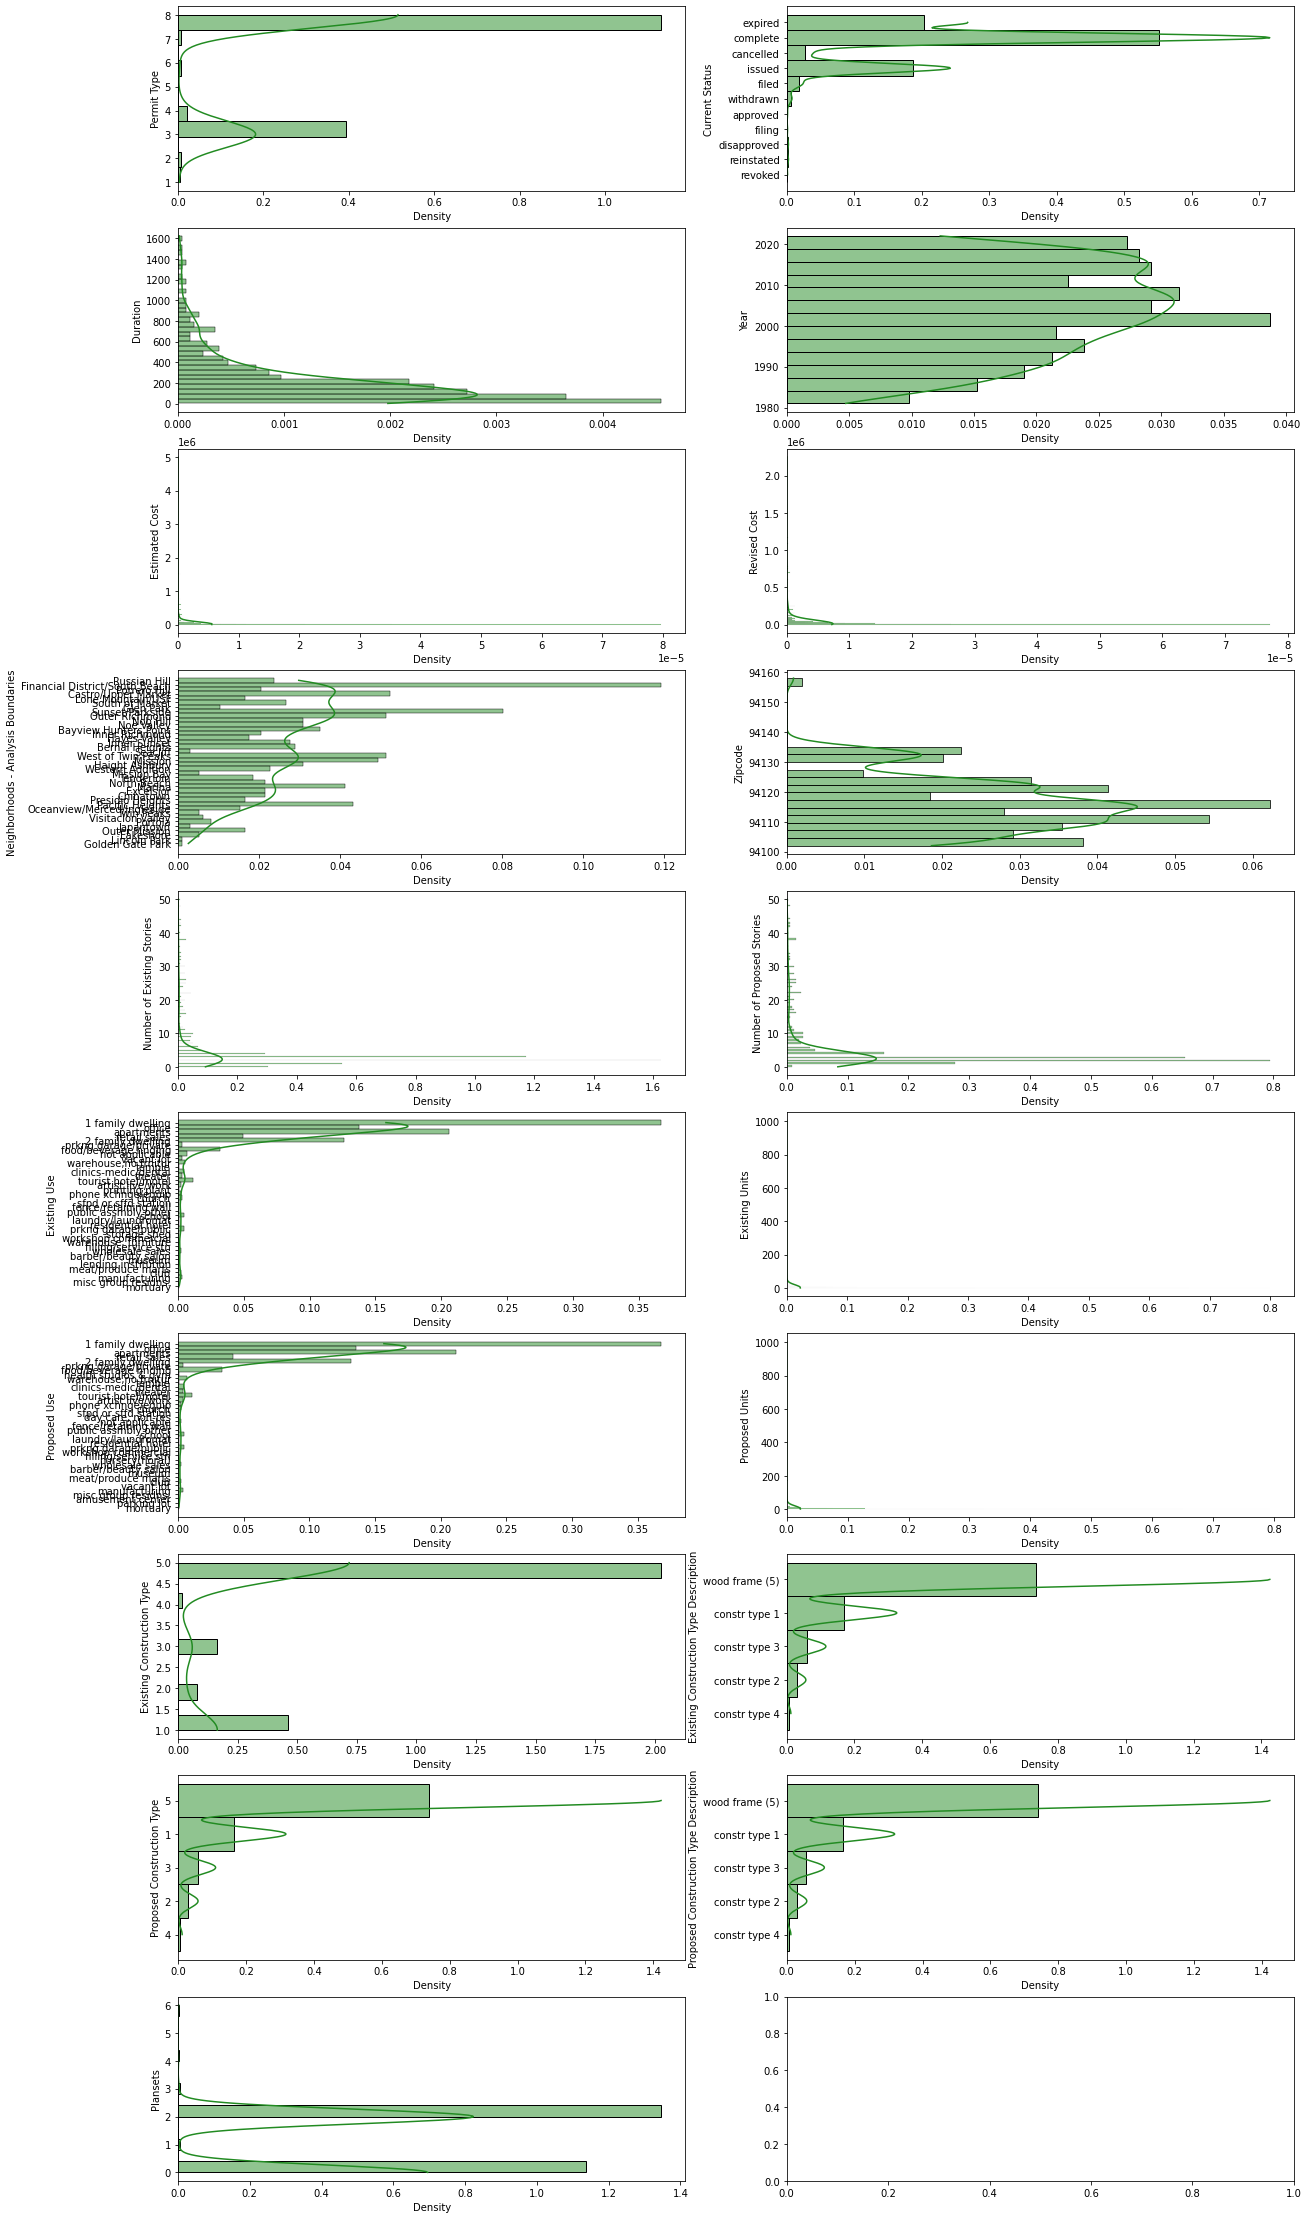

In [32]:
newdf=newdf.sample(1000)#frac=0.01)#0.15)


fig, axes = plt.subplots(nrows = 10, ncols = 2)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(20, 40)

for ax, col in zip(axes, newdf.columns):
    sns.histplot(data=newdf,y=col,kde=True,ax=ax,stat='density',color='forestgreen')
    #if 'cost' in col.lower():
    #  sns.histplot(data=newdf,y=col,kde=True,ax=ax,stat='density',color='forestgreen',log_scale=True)
    #ax.set_title(col)
    #print(col)
#fig.savefig('drive/MyDrive/colab/data_exploration_.png',dpi=800)
#fig.close()



***Let's analyze cost a bit more ***

We try to predict cost so it remains as our top priority.

In [33]:
mask = dataset['Permit Type'] < 3

filtered_dataset = dataset.loc[mask, :]
filtered_dataset = filtered_dataset.dropna(subset=['Estimated Cost'])



In [34]:
#descriptive statistics summary
filtered_dataset['Estimated Cost'].describe()

count    1.509900e+04
mean     3.497085e+06
std      1.701285e+07
min      1.000000e+00
25%      1.596500e+05
50%      3.000000e+05
75%      7.921100e+05
max      5.379586e+08
Name: Estimated Cost, dtype: float64

In [35]:
filtered_dataset['Revised Cost'].describe()

count    7.275000e+03
mean     6.107606e+06
std      2.353362e+07
min      1.000000e+00
25%      2.728480e+05
50%      5.400000e+05
75%      1.600000e+06
max      7.805000e+08
Name: Revised Cost, dtype: float64

**There are much less data in revised cost*

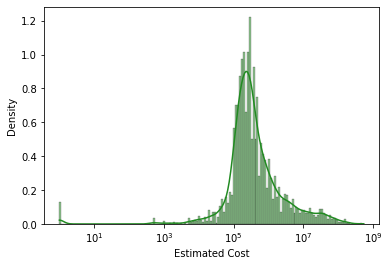

In [36]:
#histogram
sns.histplot(data= filtered_dataset , x='Estimated Cost',kde=True,stat='density',color='forestgreen',log_scale=True)

***Let's check the skewedness of the distribution***

Since we observe

    Deviation from the normal distribution.
    positive skewness.
    peakedness.


In [37]:
#skewness and kurtosis
print("Skewness: %f" % filtered_dataset['Estimated Cost'].skew())
print("Kurtosis: %f" % filtered_dataset['Estimated Cost'].kurt())

Skewness: 13.469670
Kurtosis: 282.835392


We will start by looking carefully at the relationship with other variables.

***Let's explore heatmap***

In [38]:
newdf = filtered_dataset[cols]

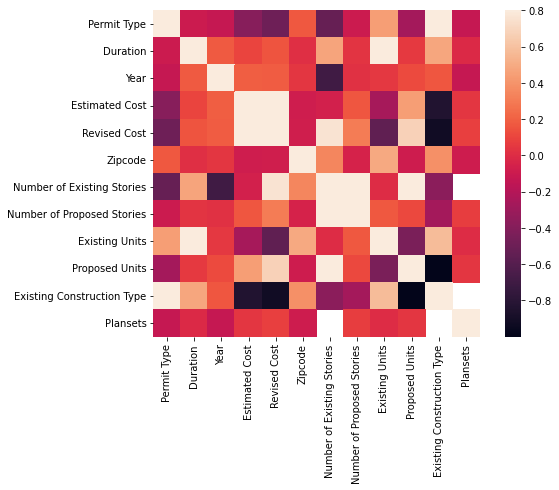

In [39]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(newdf.corr(), vmax=.8, square=True)
#fig.savefig('drive/MyDrive/colab/data_heatmap.jpg',dpi=400)

In [40]:
k = 12 #number of variables for heatmap
corrm = newdf.corr()
cols = corrm.nlargest(k, 'Estimated Cost')['Estimated Cost'].index

In [41]:
cols

Index(['Estimated Cost', 'Revised Cost', 'Proposed Units', 'Year',
       'Number of Proposed Stories', 'Duration', 'Plansets',
       'Number of Existing Stories', 'Zipcode', 'Existing Units',
       'Permit Type', 'Existing Construction Type'],
      dtype='object')

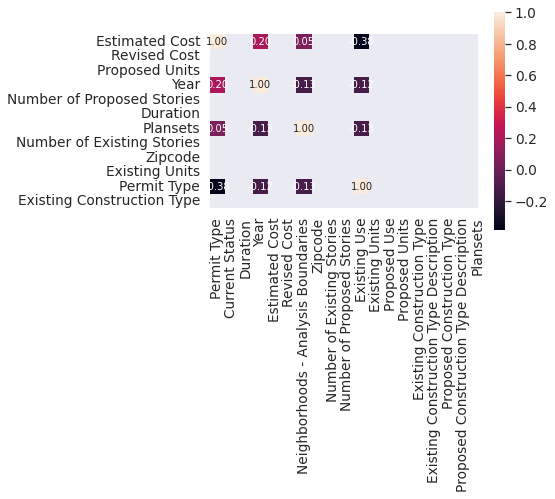

In [42]:

# correlation matrix with numerical values
import numpy as np
cm = np.corrcoef(newdf[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=newdf.columns.values)
plt.show()



**Observations of HeatMap**



*   List item
*   List item



**In summary **

we can conclude that 



*   List item
*   List item



***Trying history and normal probability plot**

In [43]:
from scipy.stats import norm
from scipy import stats

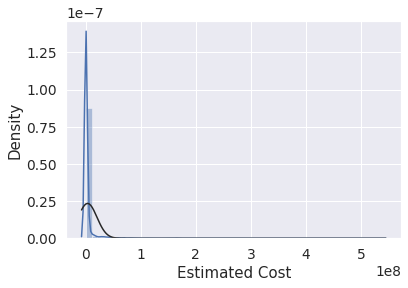

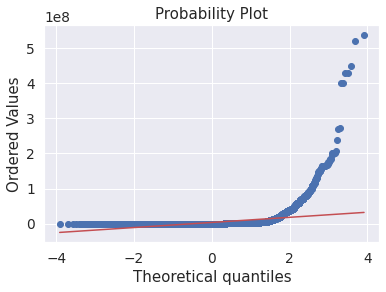

In [44]:
#histogram and normal probability plot
sns.distplot(newdf['Estimated Cost'], fit=norm);
fig = plt.figure()
res = stats.probplot(newdf['Estimated Cost'], plot=plt)

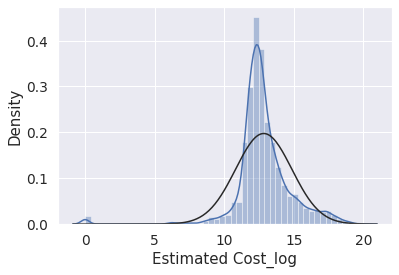

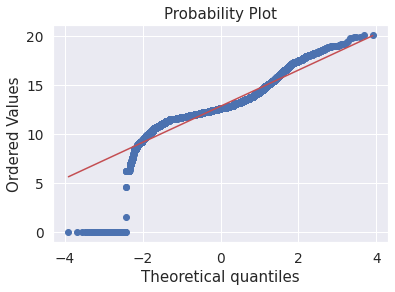

In [45]:

#applying log transformation
newdf['Estimated Cost_log']= np.log(newdf['Estimated Cost'])

#histogram and normal probability plot
sns.distplot(newdf['Estimated Cost_log'], fit=norm);
fig = plt.figure()
res = stats.probplot(newdf['Estimated Cost_log'], plot=plt)

*** Observations***



*   Log works much better
*   List item



In [46]:
#need to repeat this step for other feautres
#ref. data cleaning and explotaory https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python

***Check outliers***

#Imputing missing values
ref. https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard

#Skewed features


In [47]:

from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [48]:
numeric_feats = newdf.dtypes[newdf.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = newdf[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Proposed Units,45.226581
Number of Proposed Stories,44.698522
Estimated Cost,13.468332
Revised Cost,11.783400
Plansets,3.442893
Number of Existing Stories,0.822304
Year,0.512291
Zipcode,0.415880
Existing Units,0.000000
Existing Construction Type,-1.324471




Box Cox Transformation of (highly) skewed features

We use the scipy function boxcox1p which computes the Box-Cox transformation of 1+x

.

Note that setting λ=0

is equivalent to log1p used above for the target variable.

See this page for more details on Box Cox Transformation as well as the scipy function's page

In [49]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    newdf[feat] = boxcox1p(newdf[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 13 skewed numerical features to Box Cox transform


let's investigate further what was done for the skewed columns

***Here I do feature engineering ***

In [50]:
mask = dataset['Permit Type'] < 3

filtered_dataset = dataset.loc[mask, :]
#filtered_dataset.describe()
#filtered_dataset = filtered_dataset.dropna(subset=['Estimated Cost'])


In [51]:
#newdf.describe()

In [52]:
filtered_dataset['Proposed Construction Type'].value_counts().index

Index(['5', '1', '3', '2', '4', 'III'], dtype='object')

In [53]:
filtered_dataset['Zipcode']=filtered_dataset['Zipcode'].fillna(0).astype(int)


In [54]:
#filtered_dataset['Year'] 

In [55]:
filtered_dataset['Year']=filtered_dataset['Year'].astype(int)
myear = filtered_dataset['Year'] > 1990

filtered_dataset=filtered_dataset.loc[myear,:]


In [56]:
#filtered_dataset.describe()

In [57]:
filtered_dataset['Current Status'].value_counts()

complete       5718
expired         892
issued          850
filed           731
cancelled       598
withdrawn       562
approved         85
reinstated       68
filing           31
disapproved      16
suspend          13
revoked           1
Name: Current Status, dtype: int64

In [58]:
mstat= filtered_dataset['Current Status'] == 'complete'
#filtered_dataset['Duration'][mstat].describe()
filtered_dataset = filtered_dataset.loc[mstat,:]

In [59]:
filtered_dataset['Duration'].value_counts().index.min()

21.0

In [60]:
#filtered_dataset['Duration'] = filtered_dataset['Duration'].fillna(0).apply(lambda x : 0 if x < 0 else x)
filtered_dataset['Duration'].isna().sum()

0

In [61]:
filtered_dataset['Proposed Construction Type']=filtered_dataset['Proposed Construction Type'].apply(lambda x : '3' if x =='III' else x)

In [62]:
#for neighbors less than 20 data, we use category 'other'

col_ = "Neighborhoods - Analysis Boundaries"
n_count = filtered_dataset[col_].value_counts()
m_ng = filtered_dataset[col_].isin(n_count.index[n_count.values < 20])
filtered_dataset.loc[m_ng,col_] = 'Other'
filtered_dataset[col_].fillna('Other',inplace=True)
filtered_dataset[col_].value_counts()
filtered_dataset[col_] =filtered_dataset[col_].astype('str')

In [63]:
#category of proposed construction type
col_ = 'Proposed Construction Type'
n_count = filtered_dataset[col_].value_counts()
m_ng = filtered_dataset[col_].isin(n_count.index[n_count.values < 20])
filtered_dataset.loc[m_ng,col_] = '99'
filtered_dataset[col_].fillna('99',inplace=True)
filtered_dataset[col_].value_counts()
filtered_dataset[col_] =filtered_dataset[col_].astype('str')

In [64]:
"""
m2b = filtered_dataset["Neighborhoods - Analysis Boundaries"]!='Presidio'
filtered_dataset = filtered_dataset.loc[m2b,:]
m2c = filtered_dataset["Neighborhoods - Analysis Boundaries"]!='McLaren Park'
filtered_dataset = filtered_dataset.loc[m2c,:]
m2d = filtered_dataset["Neighborhoods - Analysis Boundaries"]!='Japantown'
filtered_dataset = filtered_dataset.loc[m2d,:]
m2c= filtered_dataset["Neighborhoods - Analysis Boundaries"].fillna('Zero')
"""
#filtered_dataset.loc[m2c,"Neighborhoods - Analysis Boundaries"]  =filtered_dataset.loc[m2c,"Zipcode"] 

'\nm2b = filtered_dataset["Neighborhoods - Analysis Boundaries"]!=\'Presidio\'\nfiltered_dataset = filtered_dataset.loc[m2b,:]\nm2c = filtered_dataset["Neighborhoods - Analysis Boundaries"]!=\'McLaren Park\'\nfiltered_dataset = filtered_dataset.loc[m2c,:]\nm2d = filtered_dataset["Neighborhoods - Analysis Boundaries"]!=\'Japantown\'\nfiltered_dataset = filtered_dataset.loc[m2d,:]\nm2c= filtered_dataset["Neighborhoods - Analysis Boundaries"].fillna(\'Zero\')\n'

In [65]:
#m3a = filtered_dataset["Current Status"]=='Complete'
#filtered_dataset = filtered_dataset.loc[m3a,:]

In [66]:
filtered_dataset['Estimated Cost'].isna().sum()

93

In [67]:
filtered_dataset = filtered_dataset.dropna(subset=['Estimated Cost'])

In [68]:
#removing estimated cost less than 5000 dollars
col_='Estimated Cost'
m_ecost = filtered_dataset [col_] < 5000
filtered_dataset=filtered_dataset.loc[~m_ecost,:]

filtered_dataset ['Estimated Cost_log10'] = filtered_dataset['Estimated Cost'].apply(lambda x : np.log10(x))
m_ecost.sum()

99

In [69]:
filtered_dataset.shape

(5526, 57)

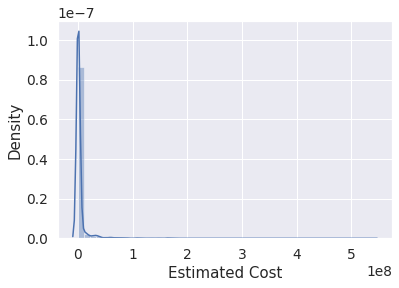

In [70]:
#filtered_dataset.describe()
#histogram and normal probability plot
sns.distplot(filtered_dataset['Estimated Cost'])#, fit=norm)

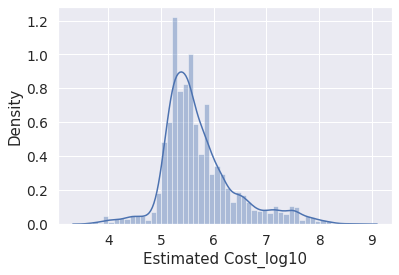

In [71]:
sns.distplot(filtered_dataset['Estimated Cost_log10'])

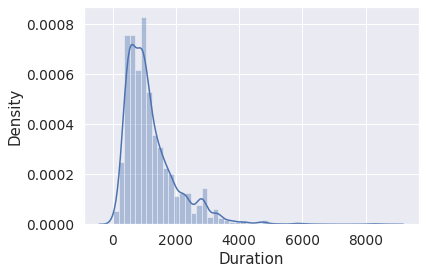

In [72]:
sns.distplot(filtered_dataset['Duration'])

In [73]:
filtered_dataset.to_csv('Building_Permits_v2.csv')

In [74]:
#abc
#For filtering certain outliers, see the code below: 

"""
low, high = df.B.quantile([0.25,0.75])
df.query('{low}<B<{high}'.format(low=low,high=high))
"""

"\nlow, high = df.B.quantile([0.25,0.75])\ndf.query('{low}<B<{high}'.format(low=low,high=high))\n"

#MACHINE LEARNING



In [75]:
#filtered_dataset["Street Name"].value_counts()

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [77]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = [
    "Permit Type",
    #"Unit",
    #"Street Name",
    "Number of Proposed Stories", 
    "Plansets", 
    "Proposed Construction Type", 
    "Neighborhoods - Analysis Boundaries", 
    #"Zipcode",
    "Year",
    "Duration"
]

target_variable = "Estimated Cost_log10"#"Estimated Cost"

X = filtered_dataset.loc[:,features_list]
Y = filtered_dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())


Separating labels from features...
...Done.

Y : 
478    5.397940
856    7.653213
967    5.505150
978    5.243038
993    5.130212
Name: Estimated Cost_log10, dtype: float64

X :
     Permit Type  Number of Proposed Stories  Plansets  \
478            2                         4.0       2.0   
856            1                         5.0       4.0   
967            2                         4.0       2.0   
978            2                         3.0       2.0   
993            2                         3.0       2.0   

    Proposed Construction Type Neighborhoods - Analysis Boundaries  Year  \
478                          5                 Castro/Upper Market  1991   
856                          1                               Other  1991   
967                          5                               Other  1995   
978                          5                               Other  1995   
993                          5                               Other  1996   

     Duration  


In [78]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['Permit Type', 'Number of Proposed Stories', 'Plansets', 'Year', 'Duration']
Found categorical features  ['Proposed Construction Type', 'Neighborhoods - Analysis Boundaries']


In [79]:
numeric_features=['Number of Proposed Stories', 'Duration']
categorical_features=['Plansets','Permit Type', 'Proposed Construction Type', 'Neighborhoods - Analysis Boundaries','Year'] #'Zipcode'

In [80]:
#X.values

In [81]:
#X_train

In [82]:
# Divide dataset Train set & Test set 
#If we use Kfold we don't need this part!
#for X_train and Y_train we use all dataset since we use K-fold
#print("Dividing into train and test sets...")
X_train = X
Y_train = Y 
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.0, random_state=0)#,stratify=Y)
print("...Done.")
print()

...Done.



In [83]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values will be replaced by columns' mean
    ('scaler', StandardScaler())
])

In [84]:
# Create pipeline for categorical features
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

In [85]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [86]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
#print(X.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X[0:5]) # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()

"""
# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head()) 
X_test = preprocessor.transform(X_test) # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.
print('...Done.')
print(X_test[0:5,:]) # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()
"""

Performing preprocessings on train set...
...Done.
     Permit Type  Number of Proposed Stories  Plansets  \
478            2                         4.0       2.0   
856            1                         5.0       4.0   
967            2                         4.0       2.0   
978            2                         3.0       2.0   
993            2                         3.0       2.0   

    Proposed Construction Type Neighborhoods - Analysis Boundaries  Year  \
478                          5                 Castro/Upper Market  1991   
856                          1                               Other  1991   
967                          5                               Other  1995   
978                          5                               Other  1995   
993                          5                               Other  1996   

     Duration  
478     815.0  
856    1100.0  
967     528.0  
978     496.0  
993     662.0  



'\n# Preprocessings on test set\nprint("Performing preprocessings on test set...")\nprint(X_test.head()) \nX_test = preprocessor.transform(X_test) # Don\'t fit again !! The test set is used for validating decisions\n# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.\n# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.\nprint(\'...Done.\')\nprint(X_test[0:5,:]) # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore\nprint()\n'

In [87]:
np.isnan(Y_train).sum()

0

In [88]:
#libraries ref. https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb



---rephrase---

Define a cross validation strategy

We use the cross_val_score function of Sklearn. However this function has not a shuffle attribut, we add then one line of code, in order to shuffle the dataset prior to cross-validation


In [89]:
#Validation function
n_folds = 3

#sqrt of negative mean error
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=0).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [90]:
#R2

def R2_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=0).get_n_splits(X_train)
    R2= cross_val_score(model, X_train, Y_train, scoring="r2", cv = kf)
    return(R2)

In [91]:
#‘explained_variance’

In [92]:
def R2_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=0).get_n_splits(X_train)
    R2= cross_val_score(model, X_train, Y_train, scoring="r2", cv = kf)
    return(R2)

In [93]:
#Defining rmsle function
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))



Base models

    Linear Regression :

No, we dont apply Robustscaler()!
This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline


In [94]:
regressor0= LinearRegression()


    LASSO Regression :



In [95]:
lasso = Lasso(alpha =0.0005, random_state=0)
#make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))



    Elastic Net Regression :

again made robust to outliers


In [96]:
ENet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=0)
#make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

Kernel Ridge Regression :

In [97]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)



    Gradient Boosting Regression :

With huber loss that makes it robust to outliers


In [98]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =0)

XGBoost :

In [99]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =0, nthread = -1)

**LightGBM - Gradient Boosting With LightGBM**

LightGBM is an algorithm developed by Microsoft in 2017. It has an advantage of changing the training algorithm that make the run time faster and likely result in a more effective model.

Ref. to the LightGBM algorithm paper:

    LightGBM: A Highly Efficient Gradient Boosting Decision Tree, 2017.
link : https://papers.nips.cc/paper/2017/hash/6449f44a102fde848669bdd9eb6b76fa-Abstract.html

In [100]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)


#Base models scores

Let's see how these base models perform on the data by evaluating the cross-validation rmsle error


In [111]:

model = regressor0
print("\nLinear regressor model\n")
score_1 = R2_cv(model)
print("R2 score - mean : {:.4f}  |  std : {:.4f}\n".format(score_1.mean(), score_1.std()))
score_2 = rmsle_cv(model)
print("\nRMSLE regressor score - mean : {:.4f}  |  std : {:.4f}\n".format(score_2.mean(), score_2.std()))


Linear regressor model

R2 score - mean : 0.3670  |  std : 0.1367


RMSLE regressor score - mean : 0.5193  |  std : 0.1325



In [112]:
model = lasso

print("\nLasso model\n")
score_1 = R2_cv(model)
print("R2 score - mean : {:.4f}  |  std : {:.4f}\n".format(score_1.mean(), score_1.std()))
score_2 = rmsle_cv(model)
print("\nRMSLE regressor score - mean : {:.4f}  |  std : {:.4f}\n".format(score_2.mean(), score_2.std()))


Lasso model

R2 score - mean : 0.3418  |  std : 0.0878


RMSLE regressor score - mean : 0.5261  |  std : 0.1016



In [113]:
model = ENet
print("\nElastic Net regressor model\n")
score_1 = R2_cv(model)
print("R2 score - mean : {:.4f}  |  std : {:.4f}\n".format(score_1.mean(), score_1.std()))
score_2 = rmsle_cv(model)
print("\nRMSLE regressor score - mean : {:.4f}  |  std : {:.4f}\n".format(score_2.mean(), score_2.std()))



Elastic Net regressor model

R2 score - mean : 0.3429  |  std : 0.0910


RMSLE regressor score - mean : 0.5259  |  std : 0.1041



In [114]:
model = KRR
print("\nKernel Ridge model\n")
score_1 = R2_cv(model)
print("R2 score - mean : {:.4f}  |  std : {:.4f}\n".format(score_1.mean(), score_1.std()))
score_2 = rmsle_cv(model)
print("\nRMSLE regressor score - mean : {:.4f}  |  std : {:.4f}\n".format(score_2.mean(), score_2.std()))


Kernel Ridge model

R2 score - mean : 0.4033  |  std : 0.0788


RMSLE regressor score - mean : 0.5006  |  std : 0.0950



In [115]:
model = GBoost
print("\nGradient Boosting model\n")
score_1 = R2_cv(model)
print("R2 score - mean : {:.4f}  |  std : {:.4f}\n".format(score_1.mean(), score_1.std()))
score_2 = rmsle_cv(model)
print("\nRMSLE regressor score - mean : {:.4f}  |  std : {:.4f}\n".format(score_2.mean(), score_2.std()))



Gradient Boosting model

R2 score - mean : 0.5470  |  std : 0.0176


RMSLE regressor score - mean : 0.4364  |  std : 0.0715



In [116]:
model = model_xgb
print("\n XGBoost model\n")
score_1 = R2_cv(model)
print("R2 score - mean : {:.4f}  |  std : {:.4f}\n".format(score_1.mean(), score_1.std()))
score_2 = rmsle_cv(model)
print("\nRMSLE regressor score - mean : {:.4f}  |  std : {:.4f}\n".format(score_2.mean(), score_2.std()))


 XGBoost model

R2 score - mean : 0.5529  |  std : 0.0344


RMSLE regressor score - mean : 0.4345  |  std : 0.0803



In [117]:
model = model_lgb
print("\nLGBM model\n")
score_1 = R2_cv(model)
print("R2 score - mean : {:.4f}  |  std : {:.4f}\n".format(score_1.mean(), score_1.std()))
score_2 = rmsle_cv(model)
print("\nRMSLE regressor score - mean : {:.4f}  |  std : {:.4f}\n".format(score_2.mean(), score_2.std()))


LGBM model

R2 score - mean : 0.5391  |  std : 0.0337


RMSLE regressor score - mean : 0.4382  |  std : 0.0610



In [108]:
score_1

array([0.49359094, 0.57428782, 0.5493392 ])

In [109]:
score_2

array([0.37818373, 0.41443536, 0.52190058])

***Add your observations and conclusions here***

NameError: ignored

***Conclusions ***

Stopped here 11/08/22


*** Conclusion : ***
Comment on your results